In [253]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import os
import pickle
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

In [199]:
if os.path.split(os.getcwd())[-1] == 'notebooks': os.chdir(os.path.split(os.getcwd())[-2])
print(os.getcwd())

/home/fitzaudoen/apps/gas-sensor-analytics-demo


In [225]:
sns.set()
sns.set_context('talk')

# Prepare data

In [200]:
df = pd.read_pickle('data/processed/train_data.pkl')

In [201]:
data = df.values
batch_id = data[:,0]
y = data[:,1]
X = data[:,3:]
cols = df.columns.values

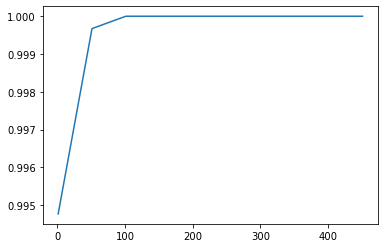

In [211]:
fig, ax = plt.subplot()
a.plot(C_arr_lr,scores_varC_lr)
plt.x_label='Regularization Parm C'
plt.ylabel='Mean Score'

In [202]:
X

array([[20189.6993, 2.0625, 4.6937, ..., -2.0119, -3.4814, -10.4205],
       [1024.3281, 1.056, 1.1523, ..., -0.28441, -0.62505, -3.9233],
       [3913.5317, 2.176816, 0.771793, ..., -6.683802, -10.092342,
        -13.676373],
       ...,
       [61007.3696, 10.781859, 15.909699, ..., -6.056229, -9.604679,
        -18.627929],
       [11286.5219, 2.762384, 3.03355, ..., -4.983074, -8.479013,
        -16.547661],
       [842.9783, 1.222312, 0.229771, ..., -1.429172, -2.254581,
        -6.413496]], dtype=object)

In [203]:
scaler = pickle.load(
    open('models/preprocessing/scaler.pkl','rb')
)
pca = pickle.load(
    open('models/preprocessing/pca.pkl','rb')
)

In [204]:
X = scaler.transform(X)
X_pca = pca.transform(X)

In [205]:
cv_df = pd.read_pickle('data/processed/cv_data.pkl')

In [206]:
data_cv = cv_df.values
batch_id_cv = data_cv[:,0]
y_cv = data[:,1]
X_cv = scaler.transform(data[:,3:])
X_cv_pca = pca.transform(X_cv)
#cols = df.columns.values

# Models without Reduction

## Logistic Regression

In [207]:
clf = LogisticRegression(random_state=0, max_iter=1000).fit(X, y)
print(clf.score(X,y))

0.9947643979057592


In [208]:
# Score of cross validation set
print(clf.score(X_cv,y_cv))

0.9947643979057592


### Set regularization parameter

In [227]:
C_arr_lr = list(range(1,500,50))
scores_varC_lr = []
score_varC_lr_cv = []
for C in C_arr_lr :
    clf = LogisticRegression(random_state=0, max_iter=5000, C=C).fit(X, y)
    scores_varC_lr.append(clf.score(X,y))
    score_varC_lr_cv.append(clf.score(X_cv,y_cv))

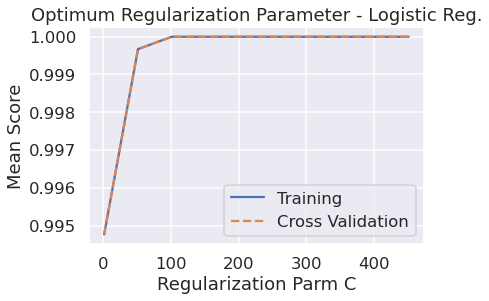

In [239]:
fig, ax = plt.subplots()
ax.plot(C_arr_lr,scores_varC_lr,label='Training')
ax.plot(C_arr_lr,score_varC_lr_cv,'--',label='Cross Validation')
ax.set_xlabel("Regularization Parm C")
ax.set_ylabel('Mean Score')
ax.set_title('Optimum Regularization Parameter - Logistic Reg.')
ax.legend()

# Learning Curve

In [240]:
n_arr_lr = list(range(50,250,25)) + list(range(250,len(X),500))
scores_learn_lr = []
scores_learn_lr_cv = []
for n in n_arr_lr:
    clf = LogisticRegression(random_state=0, max_iter=5000, C=125).fit(X[0:n,:], y[0:n])
    scores_learn_lr.append(clf.score(X[0:n,:],y[0:n]))
    scores_learn_lr_cv.append(clf.score(X_cv,y_cv))

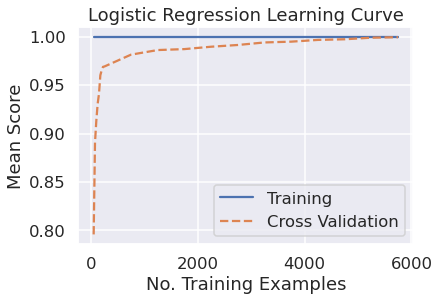

In [251]:
fig, ax = plt.subplots()
ax.plot(n_arr_lr,scores_learn_lr,label='Training')
ax.plot(n_arr_lr,scores_learn_lr_cv,'--',label='Cross Validation')
ax.set_title('Logistic Regression Learning Curve')
ax.set_xlabel('No. Training Examples')
ax.set_ylabel('Mean Score')
ax.legend()

In [192]:
clf =  LogisticRegression(random_state=0, max_iter=5000, C=125)
%timeit clf.fit(X, y)

11.6 s ± 174 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


## Support Vector Classification

In [175]:
clf = SVC(C=500)

In [176]:
clf.fit(X,y)

SVC(C=500)

In [177]:
clf.score(X,y)

1.0

In [178]:
clf.score(X_cv,y_cv)

1.0

In [271]:
C_arr_svm = list(range(1,500,50))
score_arr_svm = []
score_arr_svm_cv = []
for C in C_array:
    clf = SVC(C=C)
    clf = clf.fit(X, y)
    score_arr_svm.append(clf.score(X,y))
    score_arr_svm_cv.append(clf.score(X_cv,y_cv))


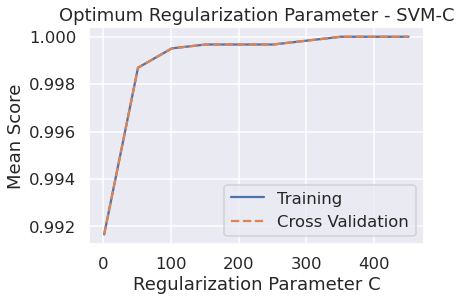

In [272]:
fig, ax = plt.subplots()
ax.plot(C_arr_svm,score_arr_svm, label='Training')
ax.plot(C_arr_svm,score_arr_svm_cv, '--',label='Cross Validation')
ax.set_xlabel('Regularization Parameter C')
ax.set_ylabel('Mean Score')
ax.set_title('Optimum Regularization Parameter - SVM-C')
ax.legend()

In [273]:
n_arr_svm = list(range(50,250,25)) + list(range(250,len(X),500))
score_arr_learn_svm = []
score_arr_learn_svm_cv = []
for n in n_arr_svm:
    clf = SVC(C=C)
    clf = clf.fit(X[0:n,:], y[0:n])
    score_arr_learn_svm.append(clf.score(X[0:n,:],y[0:n]))
    score_arr_learn_svm_cv.append(clf.score(X_cv,y_cv))

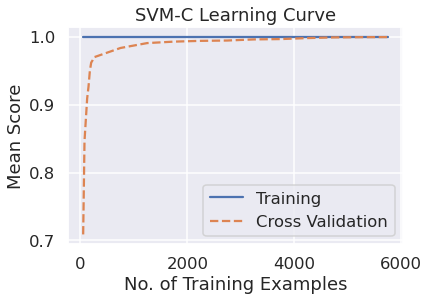

In [274]:
fig, ax = plt.subplots()
ax.plot(n_arr_svm,score_arr_learn_svm, label='Training')
ax.plot(n_arr_svm,score_arr_learn_svm_cv,'--',label='Cross Validation')
ax.set_xlabel('No. of Training Examples')
ax.set_ylabel('Mean Score')
ax.set_title('SVM-C Learning Curve')
ax.legend()

In [288]:
clf = SVC(C=400)
x = %timeit clf.fit(X,y)

566 ms ± 3.26 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [290]:
print(x)

None


### Random Forest Classification

In [276]:
clf = RandomForestClassifier(max_depth=20, random_state=0)
clf.fit(X, y)

RandomForestClassifier(max_depth=20, random_state=0)

In [277]:
clf.score(X,y)

1.0

In [278]:
clf.score(X_cv,y_cv)

1.0

In [279]:
list(range(2,20,2))

[2, 4, 6, 8, 10, 12, 14, 16, 18]

In [280]:
depth_arr_rf = list(range(2,20,2))
score_arr_rf = []
score_arr_rf_cv = []
for depth in depth_arr_rf:
    clf = RandomForestClassifier(max_depth=depth, random_state=0)
    clf = clf.fit(X, y)
    score_arr_rf.append(clf.score(X,y))
    score_arr_rf_cv.append(clf.score(X_cv,y_cv))

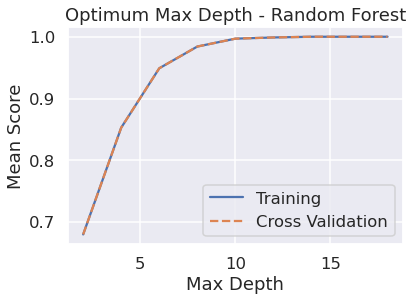

In [281]:
fig, ax = plt.subplots()
ax.plot(depth_arr_rf,score_arr_rf, label='Training')
ax.plot(depth_arr_rf,score_arr_rf_cv, '--',label='Cross Validation')
ax.set_xlabel('Max Depth')
ax.set_ylabel('Mean Score')
ax.set_title('Optimum Max Depth - Random Forest')
ax.legend()

In [283]:
n_arr_rf = list(range(50,250,25)) + list(range(250,len(X),500))
score_arr_learn_rf = []
score_arr_learn_rf_cv = []
for n in n_arr_rf:
    clf = RandomForestClassifier(max_depth=12, random_state=0)
    clf = clf.fit(X[0:n,:], y[0:n])
    score_arr_learn_rf.append(clf.score(X[0:n,:],y[0:n]))
    score_arr_learn_rf_cv.append(clf.score(X_cv,y_cv))

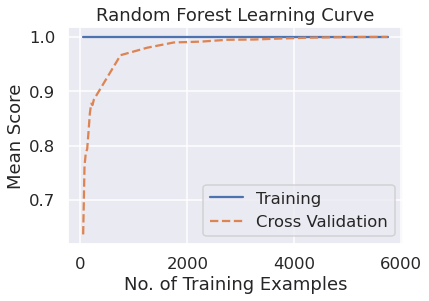

In [291]:
fig, ax = plt.subplots()
ax.plot(n_arr_rf,score_arr_learn_rf, label='Training')
ax.plot(n_arr_rf,score_arr_learn_rf_cv,'--',label='Cross Validation')
ax.set_xlabel('No. of Training Examples')
ax.set_ylabel('Mean Score')
ax.set_title('Random Forest Learning Curve')
ax.legend()

In [285]:
clf = RandomForestClassifier(max_depth=12, random_state=0)
%timeit clf.fit(X,y)

2.81 s ± 6 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


### Does Changing Parameter Allow less Training Examples?
Since training is ~100% for depth > 12, then can just plot validation curves at different depths and see if it changes

In [286]:
n_arr_rf = list(range(50,250,25)) + list(range(250,len(X),500))
score_arr_learn_rf = []
score_arr_learn_rf_cv = []
for n in n_arr_rf:
    clf = RandomForestClassifier(max_depth=50, random_state=0)
    clf = clf.fit(X[0:n,:], y[0:n])
    score_arr_learn_rf.append(clf.score(X[0:n,:],y[0:n]))
    score_arr_learn_rf_cv.append(clf.score(X_cv,y_cv))

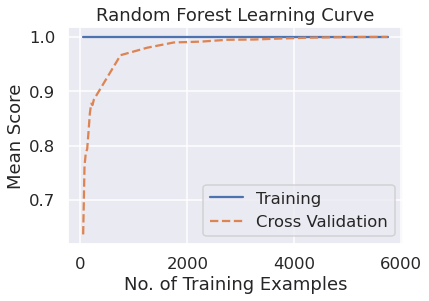

In [292]:
fig, ax = plt.subplots()
ax.plot(n_arr_rf,score_arr_learn_rf, label='Training')
ax.plot(n_arr_rf,score_arr_learn_rf_cv,'--',label='Cross Validation')
ax.set_xlabel('No. of Training Examples')
ax.set_ylabel('Mean Score')
ax.set_title('Random Forest Learning Curve')
ax.legend()

# Comparison Plot

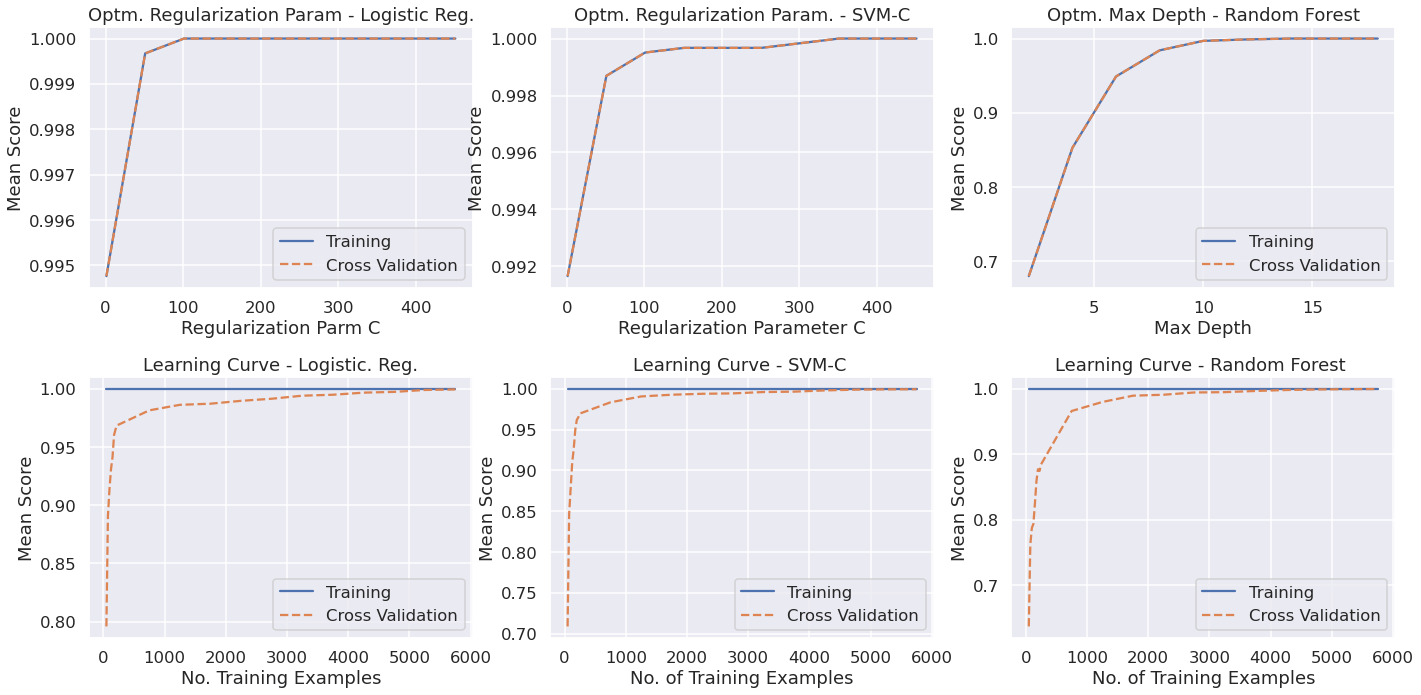

In [314]:
fig, ax = plt.subplots(2,3,figsize=(20,10))

# Logistic Regressionn 
## Set Parameter
ax[0,0].plot(C_arr_lr,scores_varC_lr,label='Training')
ax[0,0].plot(C_arr_lr,score_varC_lr_cv,'--',label='Cross Validation')
ax[0,0].set_xlabel("Regularization Parm C")
ax[0,0].set_ylabel('Mean Score')
ax[0,0].set_title('Optm. Regularization Param - Logistic Reg.')
ax[0,0].legend()
## Learning Curve
ax[1,0].plot(n_arr_lr,scores_learn_lr,label='Training')
ax[1,0].plot(n_arr_lr,scores_learn_lr_cv,'--',label='Cross Validation')
ax[1,0].set_title('Learning Curve - Logistic. Reg.')
ax[1,0].set_xlabel('No. Training Examples')
ax[1,0].set_ylabel('Mean Score')
ax[1,0].legend()
plt.tight_layout()

# SVM-C
## Regularization Parameter
ax[0,1].plot(C_arr_svm,score_arr_svm, label='Training')
ax[0,1].plot(C_arr_svm,score_arr_svm_cv, '--',label='Cross Validation')
ax[0,1].set_xlabel('Regularization Parameter C')
ax[0,1].set_ylabel('Mean Score')
ax[0,1].set_title('Optm. Regularization Param. - SVM-C')

## Learning Curve
ax[1,1].plot(n_arr_svm,score_arr_learn_svm, label='Training')
ax[1,1].plot(n_arr_svm,score_arr_learn_svm_cv,'--',label='Cross Validation')
ax[1,1].set_xlabel('No. of Training Examples')
ax[1,1].set_ylabel('Mean Score')
ax[1,1].set_title('Learning Curve - SVM-C ')
ax[1,1].legend()

# Random Forest Classification
## Max Depth
ax[0,2].plot(depth_arr_rf,score_arr_rf, label='Training')
ax[0,2].plot(depth_arr_rf,score_arr_rf_cv, '--',label='Cross Validation')
ax[0,2].set_xlabel('Max Depth')
ax[0,2].set_ylabel('Mean Score')
ax[0,2].set_title('Optm. Max Depth - Random Forest')
ax[0,2].legend()

## Learning Curve
ax[1,2].plot(n_arr_rf,score_arr_learn_rf, label='Training')
ax[1,2].plot(n_arr_rf,score_arr_learn_rf_cv,'--',label='Cross Validation')
ax[1,2].set_xlabel('No. of Training Examples')
ax[1,2].set_ylabel('Mean Score')
ax[1,2].set_title('Learning Curve - Random Forest ')
ax[1,2].legend()